# Part II - Why is your flight delayed?
## by Bader AlMutlaq

## Investigation Overview
In this investgation I want to look at factors that contribute the most to the flight delay. The main focus was delayes cause by carrires, the flight time and the flight duration

## Dataset Overview
The dataset name is "Reporting Carrier On-Time Performance Data." This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays from 1987 to 2022 provided by The U.S. Department of Transportation's (DOT). The dataset contains around 2M records of flights and 109 features for tracking flights info

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("cleaned_airline.csv")


### Setting up the datatypes

In [3]:
# reducing the size of the columns since they fit in the range of int32
df["Year"] = df["Year"].astype("int32")
df["Quarter"] = df["Quarter"].astype("int32")
df["Month"] = df["Month"].astype("int32")
df["DayofMonth"] = df["DayofMonth"].astype("int32")
df["DayOfWeek"] = df["DayOfWeek"].astype("int32")
df["DistanceGroup"] = df["DistanceGroup"].astype("int32")

# These columns are float but they represent minutes so we will convert them to int32.
df["DepDelayMinutes"] = df["DepDelayMinutes"].astype("int32")
df["ArrDelayMinutes"] = df["ArrDelayMinutes"].astype("int32")
df["CRSElapsedTime"] = df["CRSElapsedTime"].astype("int32")
df["ActualElapsedTime"] = df["ActualElapsedTime"].astype("int32")
df["AirTime"] = df["AirTime"].astype("int32")
df["CarrierDelay"] = df["CarrierDelay"].astype("int32")
df["WeatherDelay"] = df["WeatherDelay"].astype("int32")
df["NASDelay"] = df["NASDelay"].astype("int32")
df["SecurityDelay"] = df["SecurityDelay"].astype("int32")
df["LateAircraftDelay"] = df["LateAircraftDelay"].astype("int32")
df["DepHour"] = df["DepHour"].astype("int32")
df["ArrHour"] = df["ArrHour"].astype("int32")

# Convert these string columns to category to save memory.
df["Origin"] = df["Origin"].astype("category")
df["Dest"] = df["Dest"].astype("category")
df["OriginStateName"] = df["OriginStateName"].astype("category")
df["DestStateName"] = df["DestStateName"].astype("category")

# Convert the times to datetime
df["FlightDate"] = pd.to_datetime(df["FlightDate"])
df["CRSDepTime"] = pd.to_datetime(df["CRSDepTime"]).dt.time
df["CRSArrTime"] = pd.to_datetime(df["CRSArrTime"]).dt.time
df["DepTime"] = pd.to_datetime(df["DepTime"]).dt.time
df["ArrTime"] = pd.to_datetime(df["ArrTime"]).dt.time


## Distribution of Departure and Arrival Delayes
The delays take on wide range of values from 0 minutes up to 1920 minutes. Ploted on a logarithmic scale the `Departure Delay` takes on a normal distribution while `Arrival Delay` is skewed.

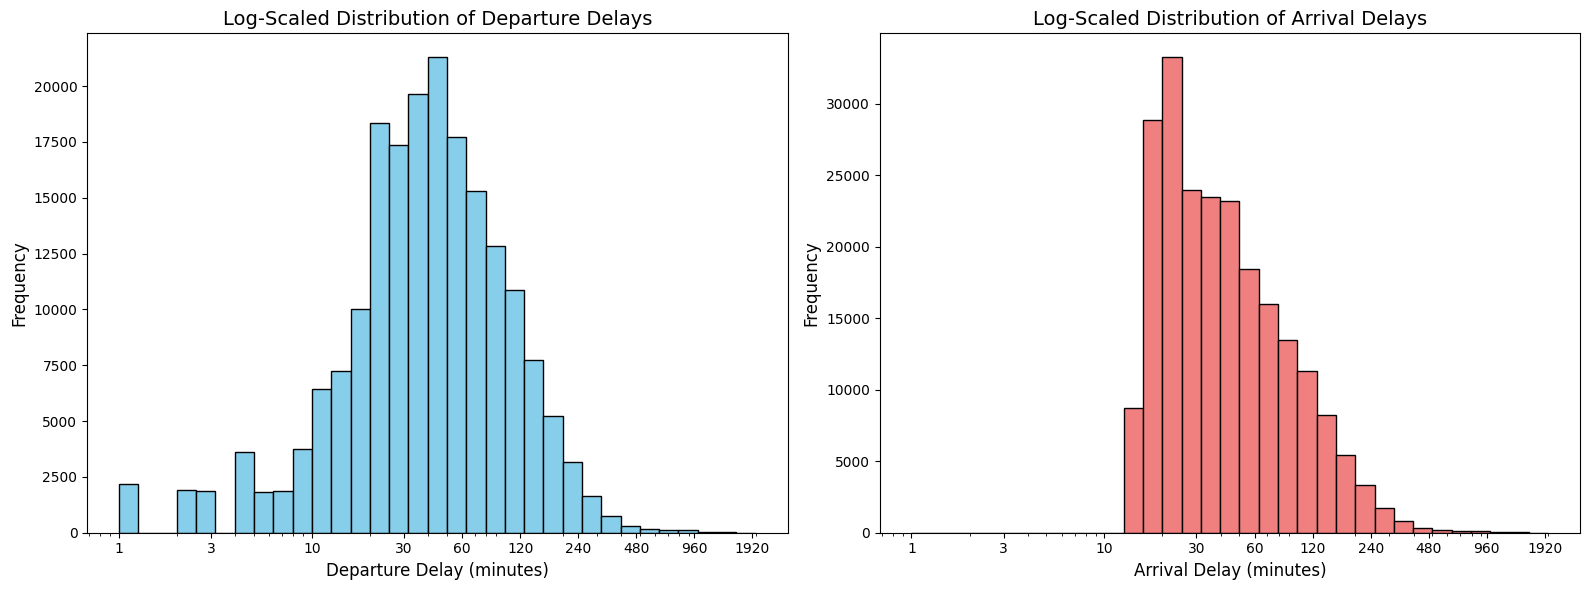

In [4]:
# Logarithmic bin size
binsize = 0.1

# Create logarithmic bins for Departure Delay
bins_dep = 10 ** np.arange(0, np.log10(df["DepDelayMinutes"].max()) + binsize, binsize)

# Create logarithmic bins for Arrival Delay
bins_arr = 10 ** np.arange(0, np.log10(df["ArrDelayMinutes"].max()) + binsize, binsize)

# Plot the histograms side by side as subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Departure Delay Histogram
axs[0].hist(df["DepDelayMinutes"], bins=bins_dep, edgecolor="black", color="skyblue")
axs[0].set_xscale("log")
axs[0].set_xticks([1, 3, 10, 30, 60, 120, 240, 480, 960, 1920])
axs[0].set_xticklabels([1, 3, 10, 30, 60, 120, 240, 480, 960, 1920])
axs[0].set_xlabel("Departure Delay (minutes)", fontsize=12)
axs[0].set_ylabel("Frequency", fontsize=12)
axs[0].set_title("Log-Scaled Distribution of Departure Delays", fontsize=14)


# Arrival Delay Histogram
axs[1].hist(df["ArrDelayMinutes"], bins=bins_arr, edgecolor="black", color="lightcoral")
axs[1].set_xscale("log")
axs[1].set_xticks([1, 3, 10, 30, 60, 120, 240, 480, 960, 1920])
axs[1].set_xticklabels([1, 3, 10, 30, 60, 120, 240, 480, 960, 1920])
axs[1].set_xlabel("Arrival Delay (minutes)", fontsize=12)
axs[1].set_ylabel("Frequency", fontsize=12)
axs[1].set_title("Log-Scaled Distribution of Arrival Delays", fontsize=14)


# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## The Effect of Flight Time on The Delay 
Grouping the flights by the time of departure and arrival and taking the mean of delay in each hour. We see an intreseting pattern where flights between 3 to 5 am have a higher delay on averag. This could reflect the fact that less employees work on the night shift causing more flights to be delayed.

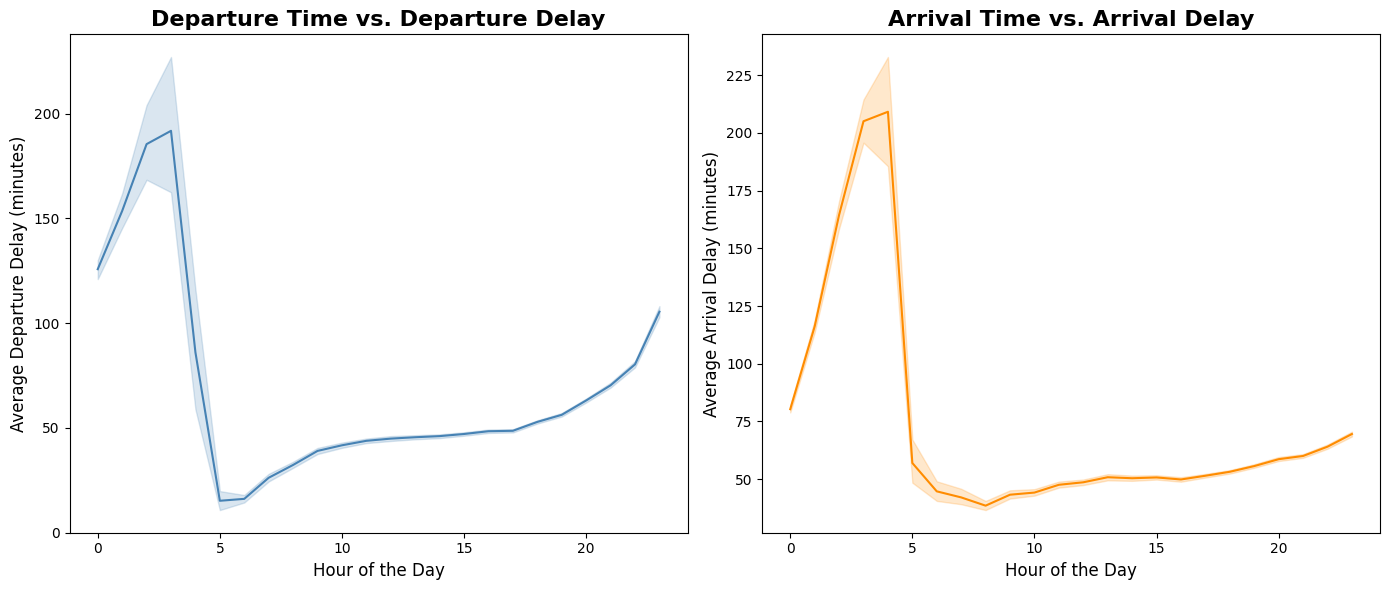

In [5]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for DepTime (Departure Time vs. Departure Delay)
sns.lineplot(
    x=df["DepTime"].apply(lambda x: x.hour),
    y="DepDelayMinutes",
    data=df,
    ax=axes[0],
    color="steelblue",
)
axes[0].set_title("Departure Time vs. Departure Delay", fontsize=16, weight="bold")
axes[0].set_xlabel("Hour of the Day", fontsize=12)
axes[0].set_ylabel("Average Departure Delay (minutes)", fontsize=12)
axes[0].tick_params(axis="both", which="major", labelsize=10)


# Plot for ArrTime (Arrival Time vs. Arrival Delay)
sns.lineplot(
    x=df["ArrTime"].apply(lambda x: x.hour),
    y="ArrDelayMinutes",
    data=df,
    ax=axes[1],
    color="darkorange",
)
axes[1].set_title("Arrival Time vs. Arrival Delay", fontsize=16, weight="bold")
axes[1].set_xlabel("Hour of the Day", fontsize=12)
axes[1].set_ylabel("Average Arrival Delay (minutes)", fontsize=12)
axes[1].tick_params(axis="both", which="major", labelsize=10)


# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## The most influential delay type
There was different causes of delay reported in the dataset. When ploted against the delay we saw that:<br>
1. `Carrier Delay`: The most correlated cause, indicating operational issues such as maintenance or crew availability.
2. `Weather Delay`: Shows a significant correlation, with adverse weather affecting flight timeliness.
3. `Late Aircraft Delay`: Moderate correlation, as late arrivals cause subsequent delays.
4. `National Airspace System (NAS) Delay`: Weaker correlation, stemming from air traffic control or congestion.
5. `Security Delay`: The least correlated, with minimal impact compared to other causes.


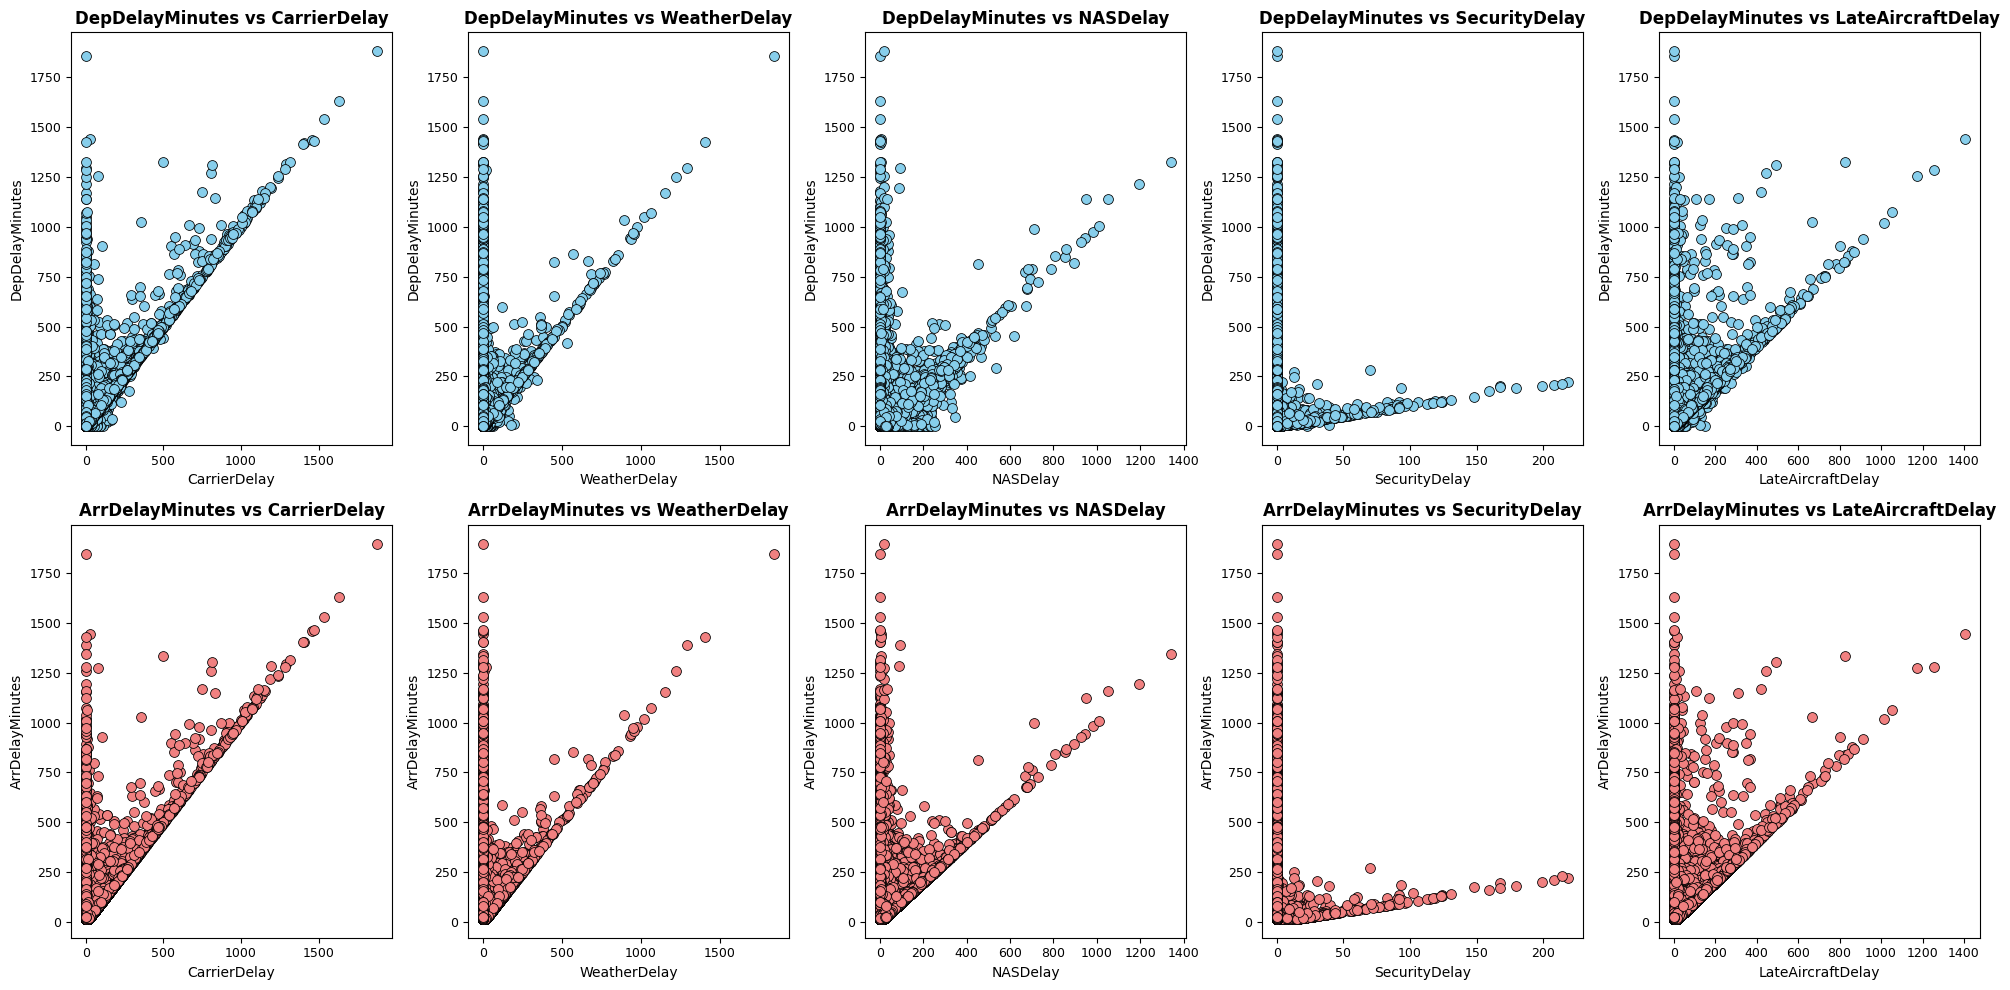

In [6]:
# Create subplots (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# For DepDelayMinutes (first row)
for ax, delay_type in zip(
    axes[0],
    ["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"],
):
    sns.scatterplot(
        data=df,
        x=delay_type,
        y="DepDelayMinutes",
        ax=ax,
        color="skyblue",
        s=50,
        edgecolor="black",
    )
    ax.set_title(f"DepDelayMinutes vs {delay_type}", fontsize=12, weight="bold")
    ax.set_xlabel(delay_type, fontsize=10)
    ax.set_ylabel("DepDelayMinutes", fontsize=10)
    ax.tick_params(axis="both", which="major", labelsize=9)

# For ArrDelayMinutes (second row)
for ax, delay_type in zip(
    axes[1],
    ["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"],
):
    sns.scatterplot(
        data=df,
        x=delay_type,
        y="ArrDelayMinutes",
        ax=ax,
        color="lightcoral",
        s=50,
        edgecolor="black",
    )
    ax.set_title(f"ArrDelayMinutes vs {delay_type}", fontsize=12, weight="bold")
    ax.set_xlabel(delay_type, fontsize=10)
    ax.set_ylabel("ArrDelayMinutes", fontsize=10)
    ax.tick_params(axis="both", which="major", labelsize=9)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Convert the notebook to slides
!jupyter nbconvert DOT_Flights_Presentation.ipynb --to slides --post serve --no-input --no-prompt